In [1]:
import random
import simpy
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

2 лаб

In [2]:
NUM_TABLES = 5  
TIME = 360  

MIN_ARRIVAL_INTERVAL = 1 
MAX_ARRIVAL_INTERVAL = 10 

MAX_WAIT_TABLE = 5 

MIN_WAIT_FOOD = 5
MAX_WAIT_FOOD = 10

MIN_CHOICE_TIME = 3  
MAX_CHOICE_TIME = 7
 
MIN_TIME_EAT = 10
MAX_TIME_EAT = 30

In [3]:
stat_table = pd.DataFrame({'Time':[]})

def customer(env, name, cafe, stat_table):
    start = env.now
    stat_table.loc[name, 'Time'] = start
    stat_table.loc[name, 'Place'] = len(cafe.queue) + 1
    print(f'{name} прибыл в кафе или встал в очередь в {start:.2f} минут')
    with cafe.request() as req_table:
        yield req_table | env.timeout(MAX_WAIT_TABLE)
        if req_table.triggered:
            stat_table.loc[name, 'Escape'] = False
            stop_wait = env.now
            stat_table.loc[name, 'Wait-Time'] = stop_wait - start
            print(f'{name} начал выбирать заказ в {stop_wait:.2f} минут')
            choice_time = random.randint(MIN_CHOICE_TIME, MAX_CHOICE_TIME)
            yield env.timeout(choice_time)
            print(f'{name} начал ожидать заказ в {env.now:.2f} минут')
            wait_time = random.randint(MIN_WAIT_FOOD, MAX_WAIT_FOOD)
            yield env.timeout(wait_time)
            print(f'{name} получил заказ в {env.now:.2f} минут')
            eat_time = random.randint(MIN_TIME_EAT, MAX_TIME_EAT)
            yield env.timeout(eat_time)
            if random.random() < 0.25:
                print(f'{name} повторно сделал заказ в {env.now:.2f} минут')
                wait_time = random.randint(MIN_WAIT_FOOD, MAX_WAIT_FOOD)
                yield env.timeout(wait_time)
                print(f'{name} получил заказ в {env.now:.2f} минут')
                eat_time = random.randint(MIN_TIME_EAT, MAX_TIME_EAT)
                yield env.timeout(eat_time)
            print(f'{name} закончил в {env.now:.2f} минут')
        else:
            stat_table.loc[name, 'Escape_Time'] = f'{env.now:.2f}'
            stat_table.loc[name, 'Escape'] = True
            stat_table.loc[name, 'Wait-Time'] = MAX_WAIT_TABLE
            print(f'{name} ушел из кафе, так как ожидание стола превысило {MAX_WAIT_TABLE} минут!!!!!!!!!!!!!!!, {env.now:.2f}')

def generate_customers(env, cafe, stat_table):
    i = 0
    while True:
        yield env.timeout(random.triangular(MIN_ARRIVAL_INTERVAL, MAX_ARRIVAL_INTERVAL, (MIN_ARRIVAL_INTERVAL + MAX_ARRIVAL_INTERVAL) / 2))
        i += 1
        env.process(customer(env, f'Клиент {i}', cafe, stat_table))

env = simpy.Environment()
cafe = simpy.Resource(env, capacity=NUM_TABLES)

env.process(generate_customers(env, cafe, stat_table))
env.run(until=TIME)

Клиент 1 прибыл в кафе или встал в очередь в 6.14 минут
Клиент 1 начал выбирать заказ в 6.14 минут
Клиент 2 прибыл в кафе или встал в очередь в 11.24 минут
Клиент 2 начал выбирать заказ в 11.24 минут
Клиент 1 начал ожидать заказ в 13.14 минут
Клиент 2 начал ожидать заказ в 16.24 минут
Клиент 3 прибыл в кафе или встал в очередь в 16.67 минут
Клиент 3 начал выбирать заказ в 16.67 минут
Клиент 1 получил заказ в 18.14 минут
Клиент 4 прибыл в кафе или встал в очередь в 19.32 минут
Клиент 4 начал выбирать заказ в 19.32 минут
Клиент 3 начал ожидать заказ в 19.67 минут
Клиент 4 начал ожидать заказ в 23.32 минут
Клиент 5 прибыл в кафе или встал в очередь в 24.16 минут
Клиент 5 начал выбирать заказ в 24.16 минут
Клиент 3 получил заказ в 24.67 минут
Клиент 2 получил заказ в 25.24 минут
Клиент 6 прибыл в кафе или встал в очередь в 28.58 минут
Клиент 4 получил заказ в 30.32 минут
Клиент 5 начал ожидать заказ в 31.16 минут
Клиент 6 ушел из кафе, так как ожидание стола превысило 5 минут!!!!!!!!!!!!!!

C:\Temp\ipykernel_1776\4245222186.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stat_table.loc[name, 'Escape'] = False


In [4]:
print(stat_table[stat_table.Escape == True].shape[0], '- количество ушедших')
print(f'{stat_table[stat_table.Escape == True].shape[0] / stat_table.shape[0] * 100:.2f}% - ушедших')
print('Статистика по времени ожидания:', '\n', stat_table['Wait-Time'][stat_table['Wait-Time'] != MAX_WAIT_TABLE].describe())
stat_table[stat_table.Escape == True]

22 - количество ушедших
33.85% - ушедших
Статистика по времени ожидания: 
 count    43.000000
mean      1.225666
std       1.760416
min       0.000000
25%       0.000000
50%       0.000000
75%       2.557882
max       4.996568
Name: Wait-Time, dtype: float64


,Time,Place,Escape,Wait-Time,Escape_Time
Клиент 6,28.578660,1.0,True,5.0,33.58
Клиент 7,35.686581,1.0,True,5.0,40.69
Клиент 8,42.599619,1.0,True,5.0,47.60
Клиент 18,109.037572,1.0,True,5.0,114.04
Клиент 22,132.393750,1.0,True,5.0,137.39
Клиент 23,137.265624,2.0,True,5.0,142.27
Клиент 26,159.439178,1.0,True,5.0,164.44
Клиент 30,183.551477,1.0,True,5.0,188.55
Клиент 34,204.940918,1.0,True,5.0,209.94
Клиент 36,218.055767,1.0,True,5.0,223.06


3 лаб

In [84]:
def customer(env, name, cafe, rev):
    start = env.now
    stat_table.loc[name, 'Time'] = start
    with cafe.request() as req_table:
        yield req_table | env.timeout(MAX_WAIT_TABLE)
        if req_table.triggered:
            stat_table.loc[name, 'Escape'] = 'False'
            stop_wait = env.now
            stat_table.loc[name, 'Wait-Time'] = stop_wait - start
            choice_time = random.randint(MIN_CHOICE_TIME, MAX_CHOICE_TIME)
            yield env.timeout(choice_time)
            wait_time = random.randint(MIN_WAIT_FOOD, MAX_WAIT_FOOD)
            yield env.timeout(wait_time)
            eat_time = random.randint(MIN_TIME_EAT, MAX_TIME_EAT)
            yield env.timeout(eat_time)
        else: 
            stat_table.loc[name, 'Escape_Time'] = f'{env.now:.2f}'
            stat_table.loc[name, 'Escape'] = 'True'
            stat_table.loc[name, 'Wait-Time'] = MAX_WAIT_TABLE
        if rev == True:
            if random.random() < 0.25:
                wait_time = random.randint(MIN_WAIT_FOOD, MAX_WAIT_FOOD)
                yield env.timeout(wait_time)
                eat_time = random.randint(MIN_TIME_EAT, MAX_TIME_EAT)
                yield env.timeout(eat_time)
            
def generate_customers(env, cafe, rev = False):
    i = 0
    while True:
        yield env.timeout(random.triangular(MIN_ARRIVAL_INTERVAL, MAX_ARRIVAL_INTERVAL, (MIN_ARRIVAL_INTERVAL + MAX_ARRIVAL_INTERVAL) / 2))
        i += 1
        env.process(customer(env, f'Клиент {i}', cafe, rev = rev))

С обратной связью

In [75]:
n_table = 15
x = [i for i in range(1, n_table + 1)]
y_1 = []
for n_table in range(1, n_table + 1):
    dist = np.array([])
    for _ in range(100):
        stat_table = pd.DataFrame({'Time':[]})
        env = simpy.Environment()
        cafe = simpy.Resource(env, capacity=n_table)
        env.process(generate_customers(env, cafe, rev=True))
        env.run(until=TIME)
        dist = np.append(dist, stat_table[stat_table.Escape == 'True'].shape[0] / stat_table.shape[0] * 100)
    y_1.append(dist.mean())

Без обратной связи

In [83]:
n_table = 15
x = [i for i in range(1, n_table + 1)]
y_0 = []
for n_table in range(1, n_table + 1):
    dist = np.array([])
    for _ in range(100):
        stat_table = pd.DataFrame({'Time':[]})
        env = simpy.Environment()
        cafe = simpy.Resource(env, capacity=n_table)
        env.process(generate_customers(env, cafe, rev=False))
        env.run(until=TIME)
        dist = np.append(dist, stat_table[stat_table.Escape == 'True'].shape[0] / stat_table.shape[0] * 100)
    y_0.append(dist.mean())

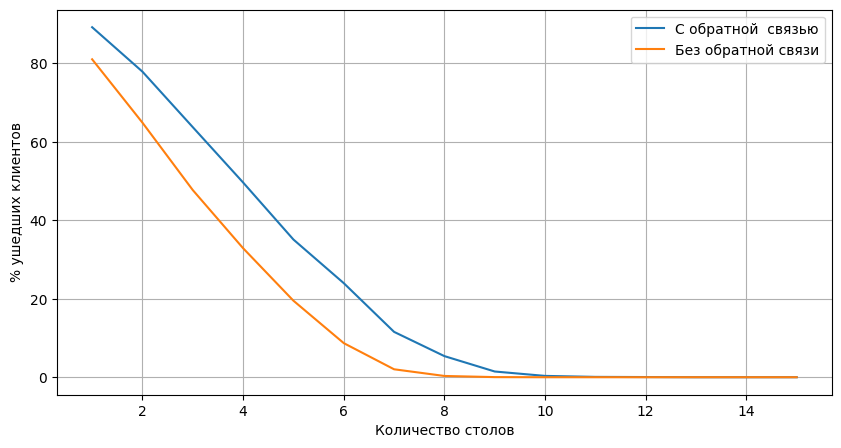

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(x, y_1, label='С обратной  связью')
plt.plot(x, y_0, label='Без обратной связи')
plt.xlabel('Количество столов')
plt.ylabel('% ушедших клиентов')
plt.legend()
plt.grid()

4 лаб

In [2]:
def customer(env, name, cafe, cook, stat_table, t):
    start = env.now
    stat_table.loc[name, 'Time'] = start
    with cafe.request() as req_table:
        yield req_table | env.timeout(MAX_WAIT_TABLE)
        if req_table.triggered:
            stat_table.loc[name, 'Type'] = t
            stat_table.loc[name, 'Escape'] = 'False'
            stop_wait = env.now
            stat_table.loc[name, 'Wait-Time'] = stop_wait - start
            choice_time = random.randint(MIN_CHOICE_TIME, MAX_CHOICE_TIME)
            yield env.timeout(choice_time)
            t = cook.request()
            yield t
            wait_time = random.randint(MIN_WAIT_FOOD, MAX_WAIT_FOOD)
            yield env.timeout(wait_time)
            cook.release(t)
            eat_time = random.randint(MIN_TIME_EAT, MAX_TIME_EAT)
            yield env.timeout(eat_time)
            if random.random() < 0.25:
                wait_time = random.randint(MIN_WAIT_FOOD, MAX_WAIT_FOOD)
                yield env.timeout(wait_time)
                eat_time = random.randint(MIN_TIME_EAT, MAX_TIME_EAT)
                yield env.timeout(eat_time)
        else: 
            stat_table.loc[name, 'Escape_Time'] = f'{env.now:.2f}'
            stat_table.loc[name, 'Escape'] = 'True'
            stat_table.loc[name, 'Wait-Time'] = MAX_WAIT_TABLE
            stat_table.loc[name, 'Type'] = t

def generate_customers_1(env, cafe, cook, stat_table):
    i = 0
    while True:
        yield env.timeout(random.triangular(MIN_ARRIVAL_INTERVAL_1, MAX_ARRIVAL_INTERVAL_1, (MIN_ARRIVAL_INTERVAL_1 + MAX_ARRIVAL_INTERVAL_1) / 2))
        i += 1
        env.process(customer(env, f'Клиент {i}, 1 тип', cafe, cook, stat_table, t = 1))

def generate_customers_2(env, cafe, cook, stat_table):
    i = 0
    while True:
        yield env.timeout(random.triangular(MIN_ARRIVAL_INTERVAL_2, MAX_ARRIVAL_INTERVAL_2, (MIN_ARRIVAL_INTERVAL_2 + MAX_ARRIVAL_INTERVAL_2) / 2))
        i += 1
        env.process(customer(env, f'Клиент {i}, 2 тип', cafe, cook, stat_table, t = 2))

NUM_TABLES_1 = 5
NUM_TABLES_2 = 5
MIN_ARRIVAL_INTERVAL_1 = 1 
MAX_ARRIVAL_INTERVAL_1 = 8 
MIN_ARRIVAL_INTERVAL_2 = 4
MAX_ARRIVAL_INTERVAL_2 = 11 
MIN_CHOICE_TIME = 3  
MAX_CHOICE_TIME = 7
MIN_TIME_EAT = 10
MAX_TIME_EAT = 30
MAX_WAIT_TABLE = 5 

NUM_COOK = 20
TIME = 360  
MIN_WAIT_FOOD = 10
MAX_WAIT_FOOD = 30

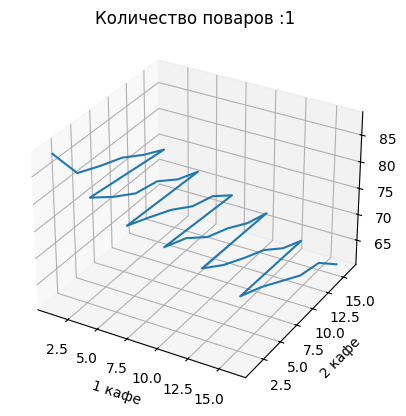

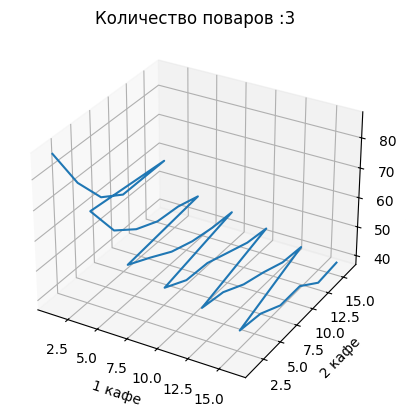

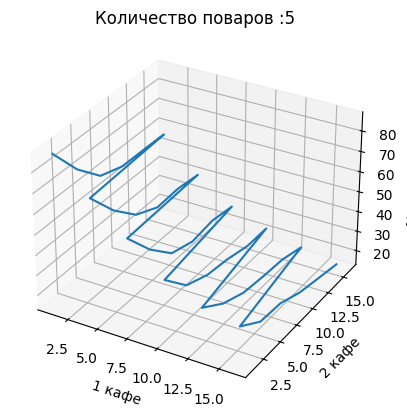

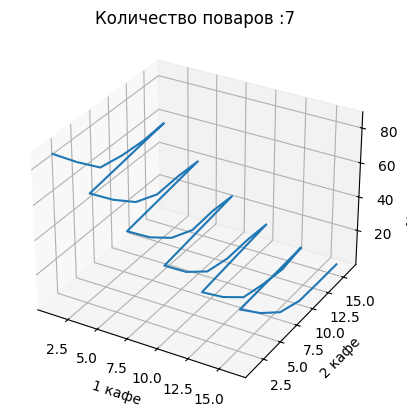

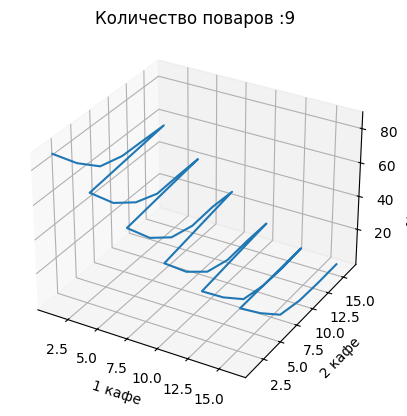

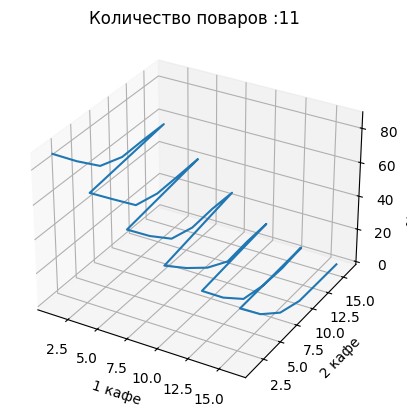

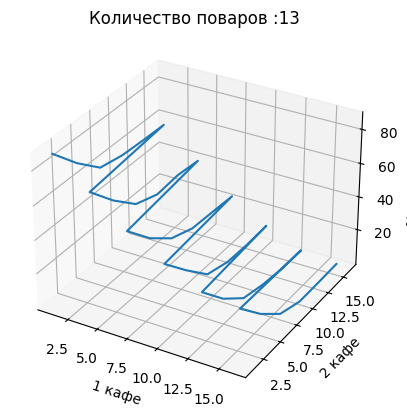

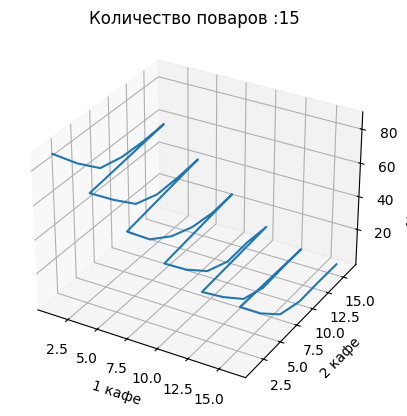

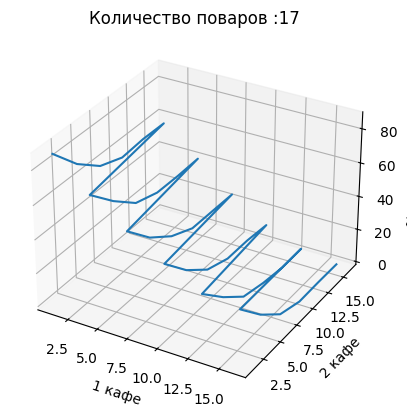

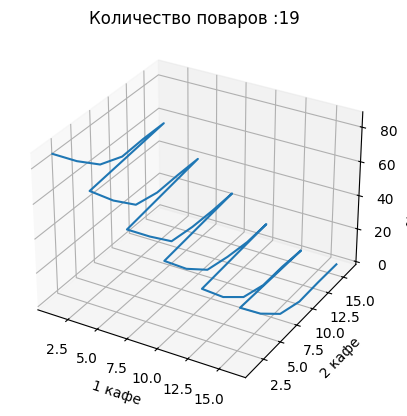

In [3]:
for n_cook in range(1, 20, 2):
    stat_table = pd.DataFrame([])
    n_table = 17
    x = []
    y = []
    z = []
    for n_1 in range(1, n_table, 3):
        for n_2 in range(1, n_table, 3):
            dist = np.array([])
            for _ in range(10):
                stat_table = pd.DataFrame({'Time':[]})
                env = simpy.Environment()
                cafe_1 = simpy.Resource(env, capacity=n_1)
                cafe_2 = simpy.Resource(env, capacity=n_2)
                cook = simpy.Resource(env, capacity=n_cook)
                env.process(generate_customers_1(env, cafe_1, cook, stat_table))
                env.process(generate_customers_2(env, cafe_2, cook, stat_table))
                env.run(until=TIME)
                dist = np.append(dist, stat_table[stat_table.Escape == 'True'].shape[0] / stat_table.shape[0] * 100)
            z.append(dist.mean())
            x.append(n_1)
            y.append(n_2)
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot3D(x, y, z)
    ax.set_xlabel('1 кафе')
    ax.set_ylabel('2 кафе')
    ax.set_zlabel('% ушедших')
    ax.set_title(f'Количество поваров :{n_cook}')
    plt.show()
